# Notebook Imports


In [1]:
#from sklearn.datasets import load_boston
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import boston_valuation as val

%matplotlib inline

# Gather Data


[Source: Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [2]:
#boston_dataset = load_boston()
boston_dataset = fetch_openml(name='boston', version=1)

In [3]:
type(boston_dataset)

sklearn.utils._bunch.Bunch

In [4]:
boston_dataset

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [5]:
dir(boston_dataset)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [6]:
print(boston_dataset.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

### Data points and features

In [7]:
type(boston_dataset.data)

pandas.core.frame.DataFrame

In [8]:
boston_dataset.data.shape # chaining dot notation

(506, 13)

In [9]:
boston_dataset.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [10]:
# Actual prices in thousands (000s) 
boston_dataset.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## Data exploration with Pandas dataframes

In [11]:
# Create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add column with the price (target)
data['PRICE'] = boston_dataset.target

In [12]:
data.head() # The top rows look like this

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
data.tail() # Rows at bottom of dataframe look like this:

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [14]:
data.count() # show us the number of row

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for missing values

In [15]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


## Visualising Data - Histograms, Distributions and Bar Charts

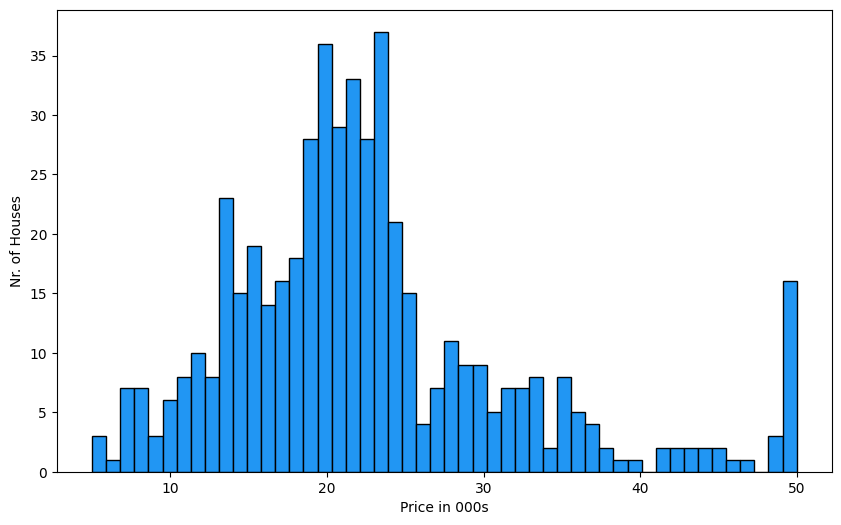

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196f3')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Houses')
plt.show()

<Figure size 1000x600 with 0 Axes>

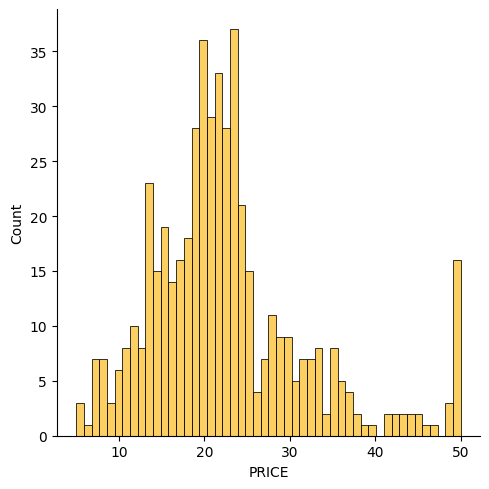

In [18]:
plt.figure(figsize=(10, 6))
#sns.distplot(data['PRICE'], bins=50, hist=True, kde=False, color='#fbc02d')
sns.displot(data['PRICE'], bins=50, kind='hist', kde=False, color='#fbc02d')
plt.show()

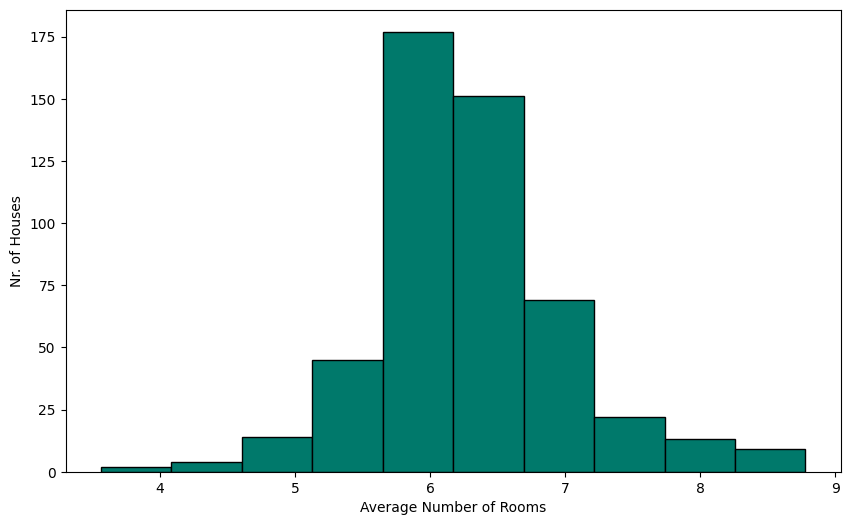

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(data['RM'], ec='black', color='#00796b')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

In [20]:
data['RM'].mean()

np.float64(6.284634387351779)

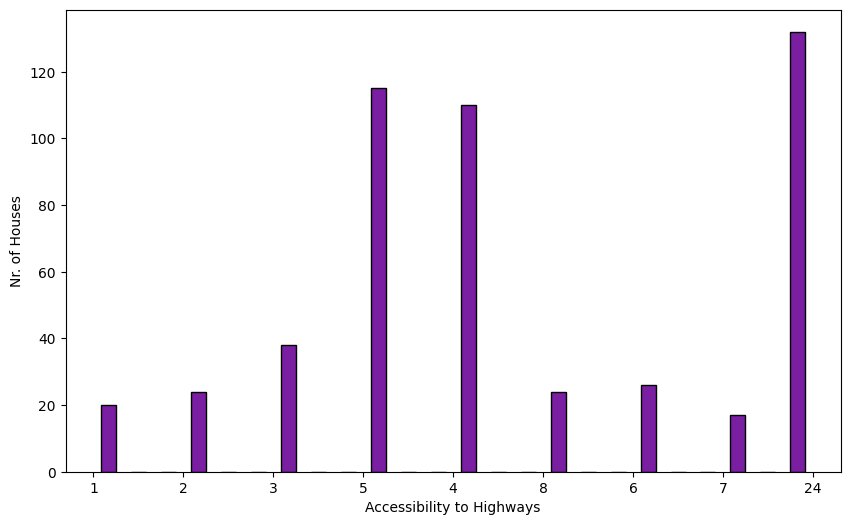

In [21]:
# Challenge: Create a meaningful histogram for RAD using matplotlib ... in royal purple
plt.figure(figsize=(10, 6))
plt.hist(data['RAD'], bins=24, ec='black', color='#7b1fa2', rwidth=0.5)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

In [22]:
data['RAD'].value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

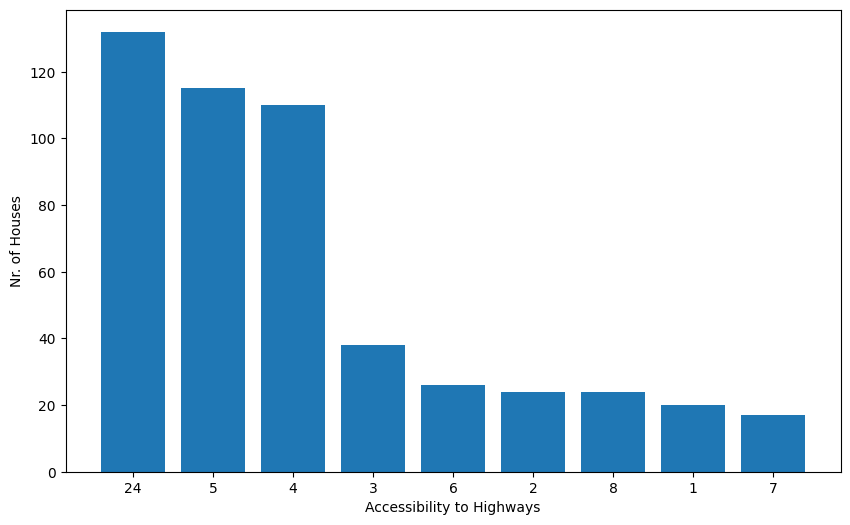

In [23]:
frequency = data['RAD'].value_counts()
#type(frequency)
#frequency.index
#frequency.axes[0]
plt.figure(figsize=(10, 6))
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.bar(frequency.index, height=frequency)
plt.show()

In [24]:
data['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

## Descriptive Statistics

In [25]:
data['PRICE'].min()

np.float64(5.0)

In [26]:
data['PRICE'].max()

np.float64(50.0)

In [27]:
data.min(numeric_only=True)

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [28]:
data.max(numeric_only=True)

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [29]:
data.mean(numeric_only=True)

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [30]:
data.median(numeric_only=True)

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [31]:
data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [32]:
data['PRICE'].corr(data['RM'])

np.float64(0.6953599470715393)

In [33]:
# Challenge: Calculate the correlation between property prices and the pupil teacher ratio
data['PRICE'].corr(data['PTRATIO'])

np.float64(-0.5077866855375616)

In [34]:
data.corr() # Pearson Correlation Coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [35]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

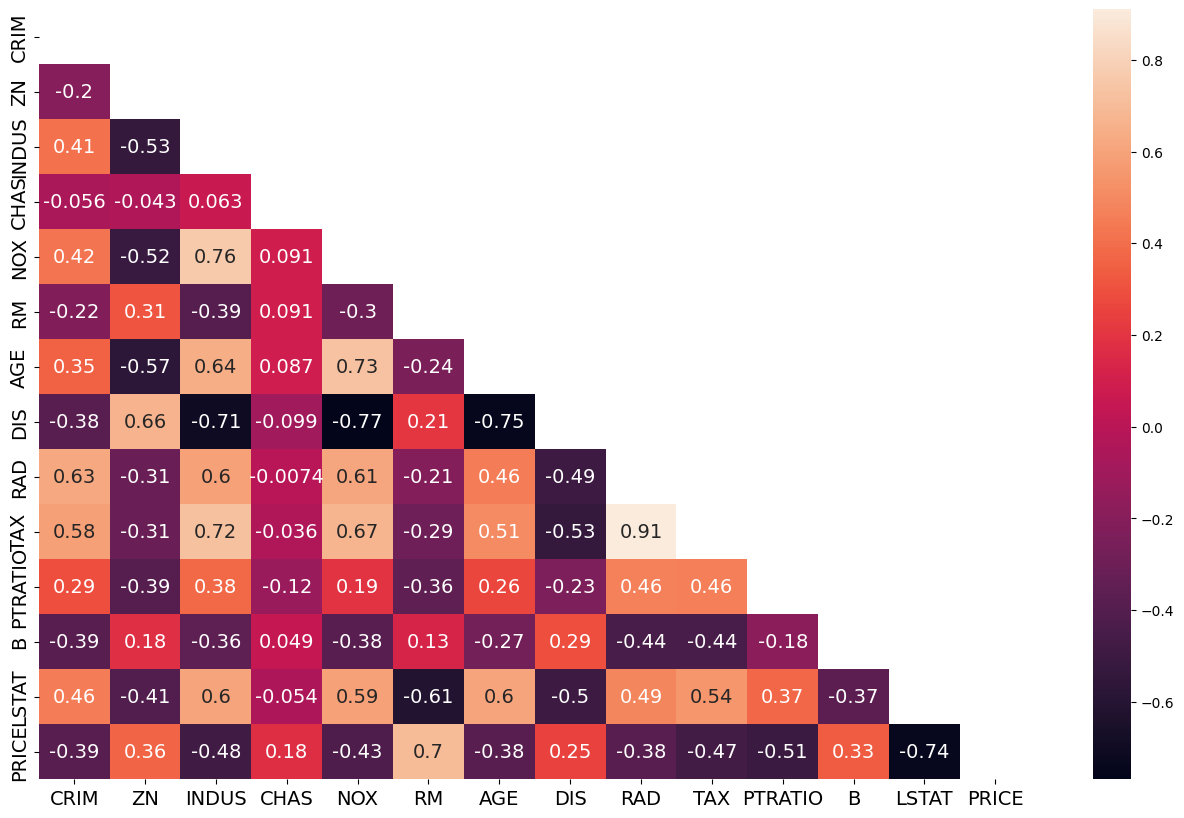

In [36]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [37]:
# Challenge: Picture the relationship between pollution and distance in your head
# Then create a scatter plot between DIS and NOX

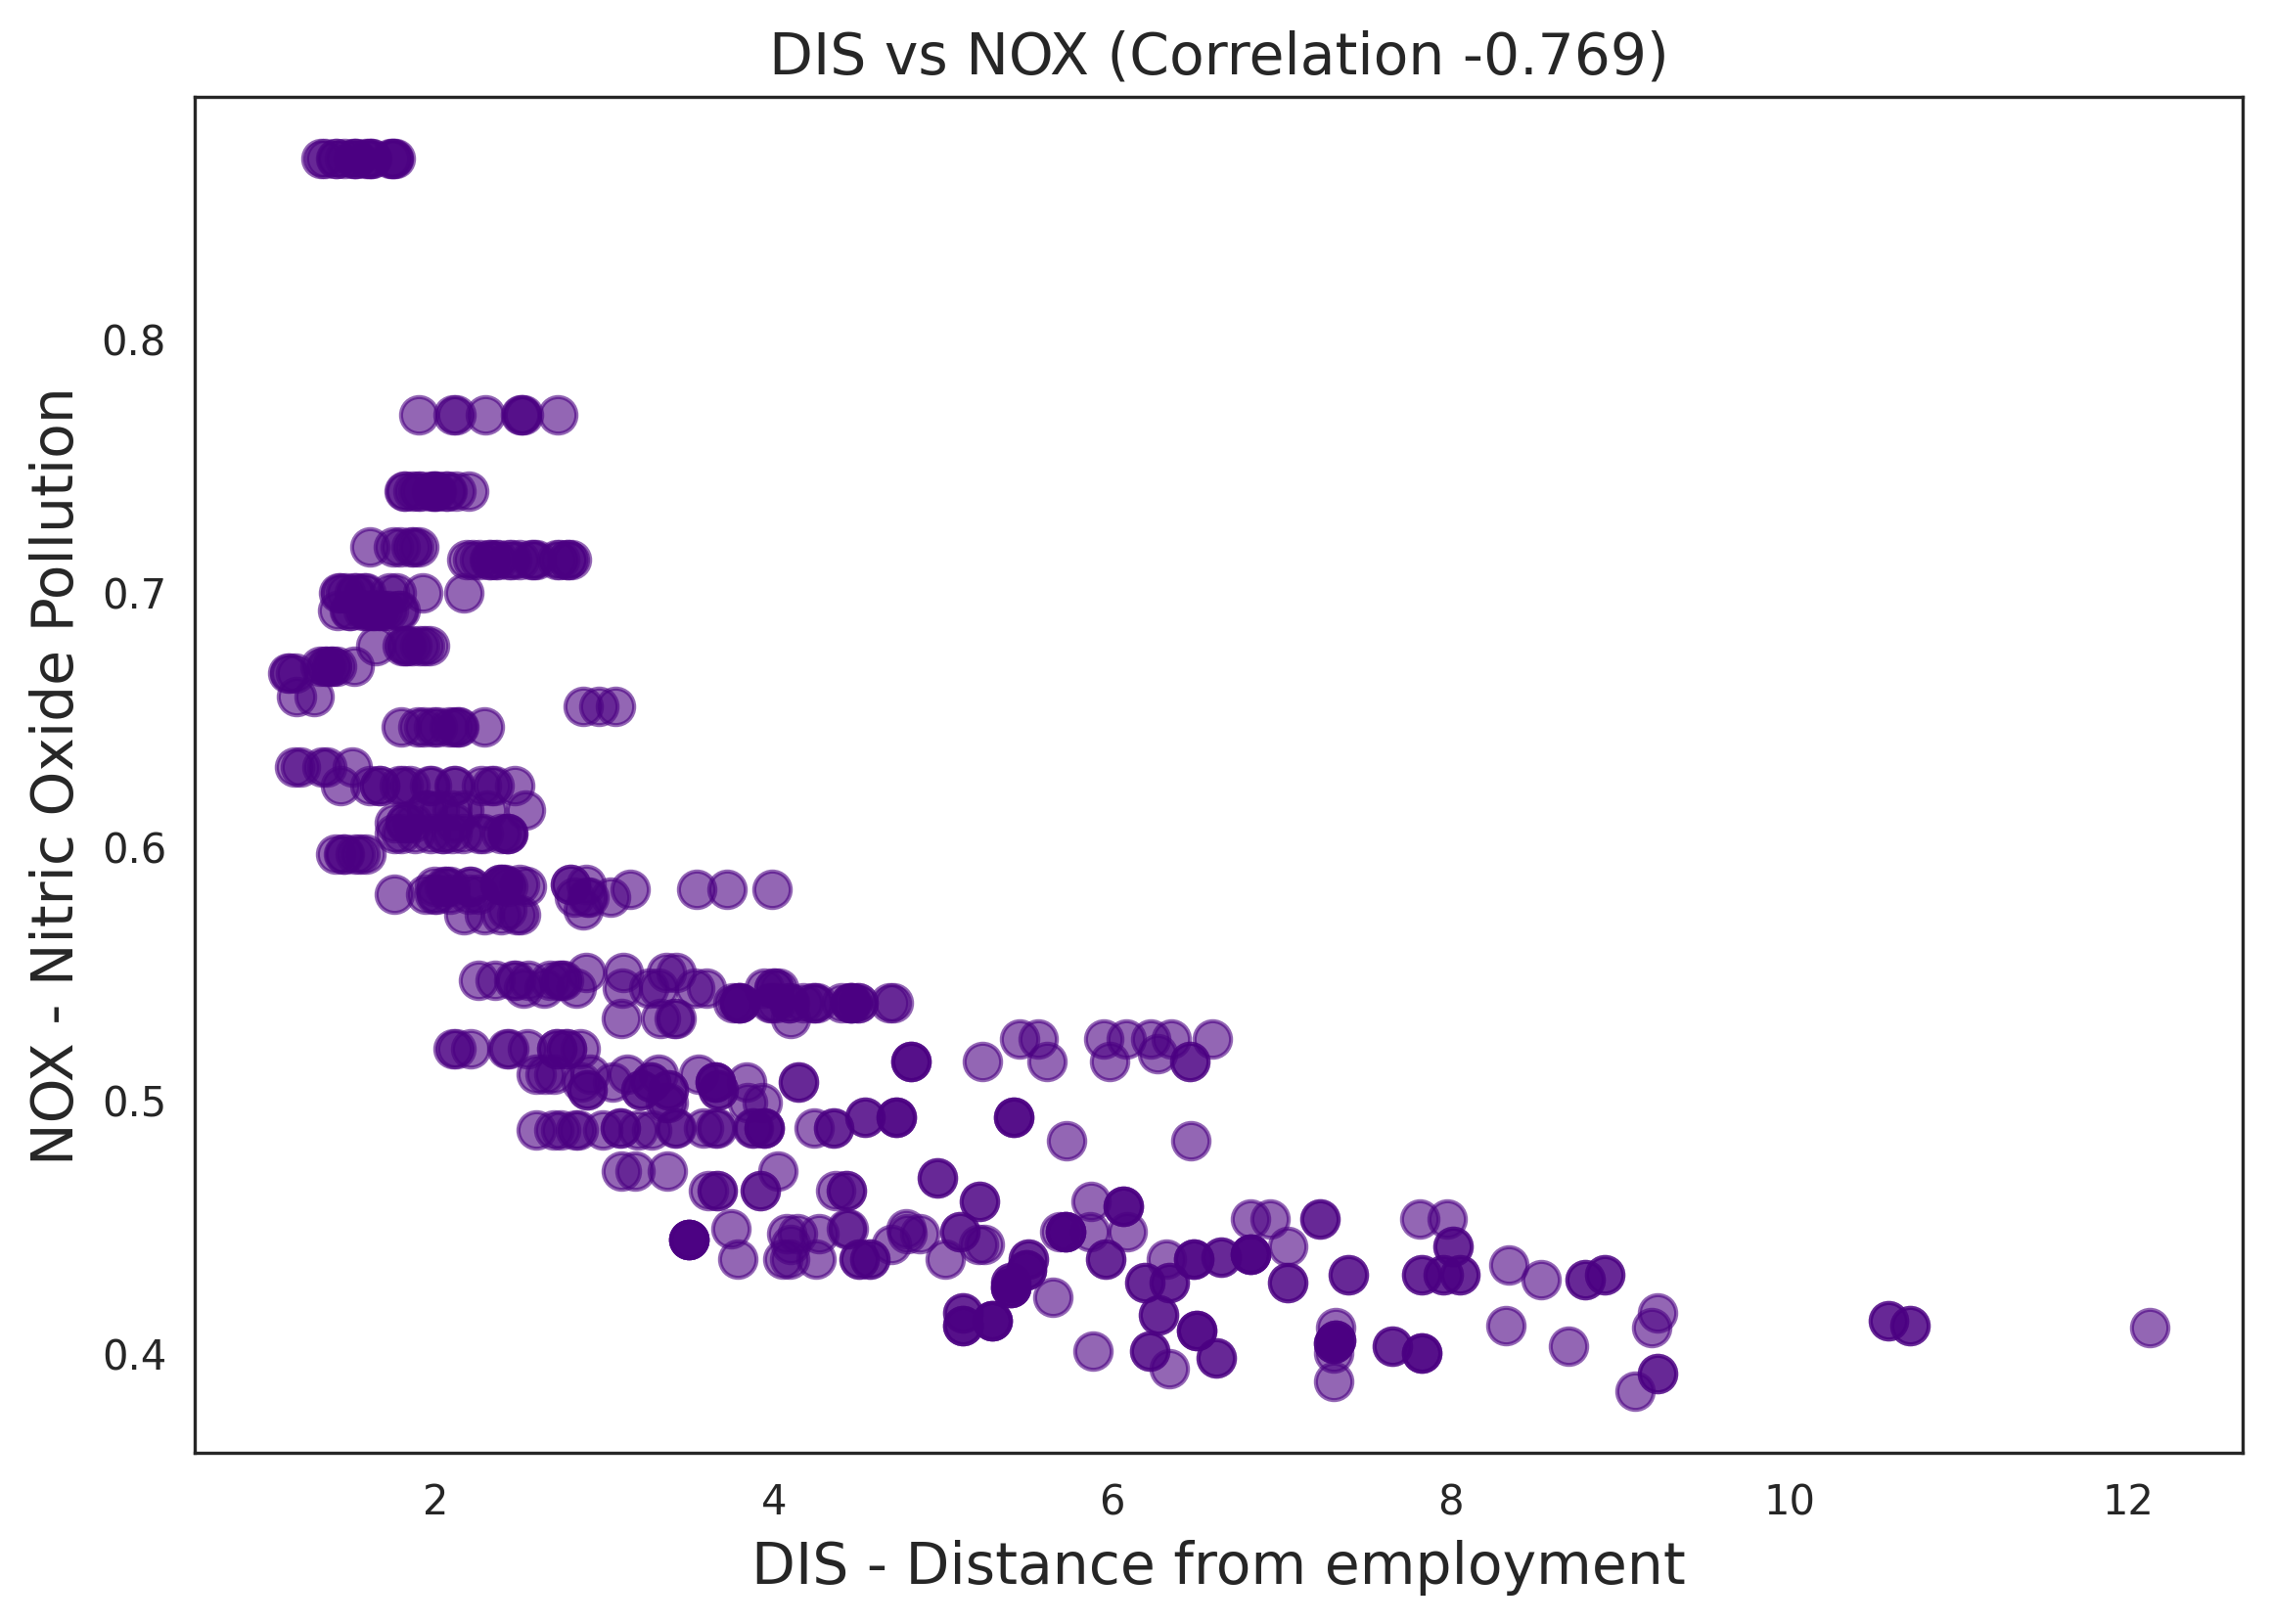

In [38]:
nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)

plt.figure(figsize=(9, 6), dpi=300)
plt.scatter(x=data['DIS'], y=data['NOX'], alpha=0.6, s=80, color='indigo')

plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
plt.show()

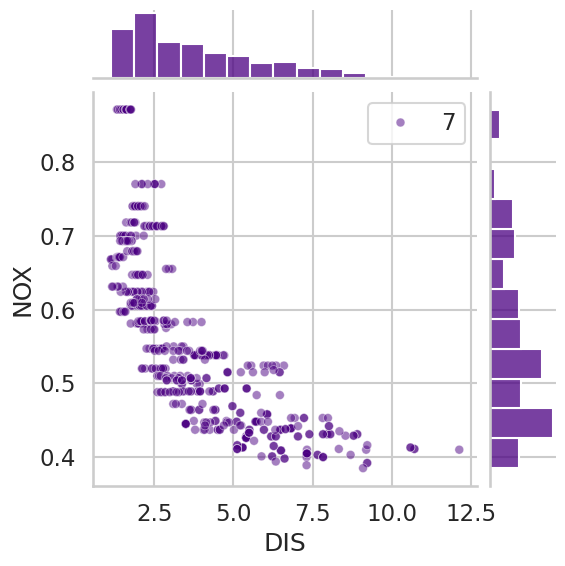

In [39]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], size=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

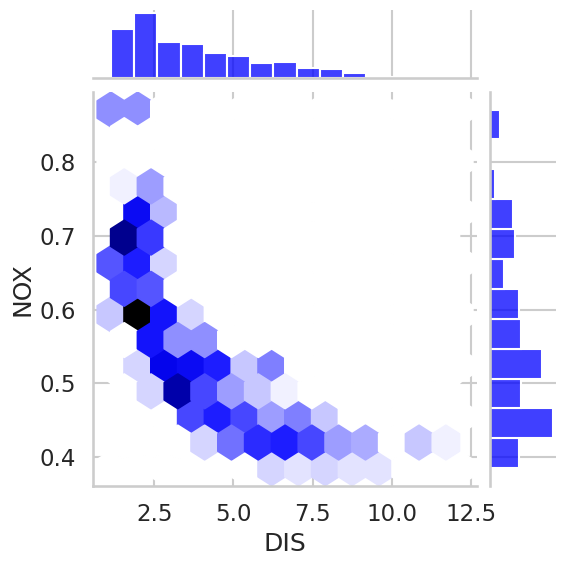

In [41]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
#sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex', size=7, color='blue')
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex', color='blue')
plt.show()

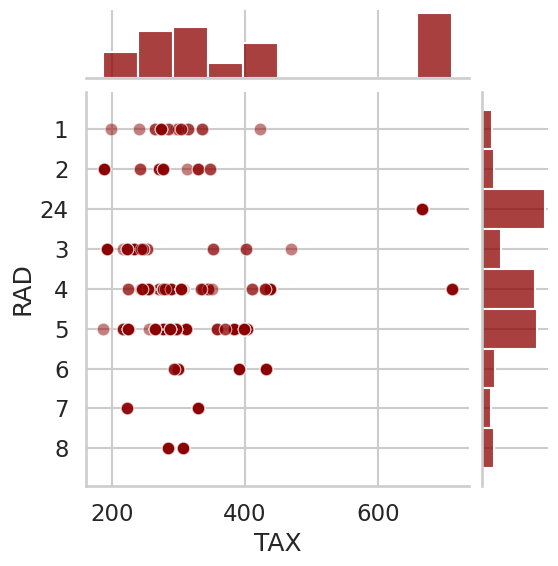

In [42]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
#sns.jointplot(x=data['TAX'], y=data['RAD'], size=7, color='darkred', joint_kws={'alpha':0.5})
sns.jointplot(x=data['TAX'], y=data['RAD'], color='darkred', joint_kws={'alpha':0.5})
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

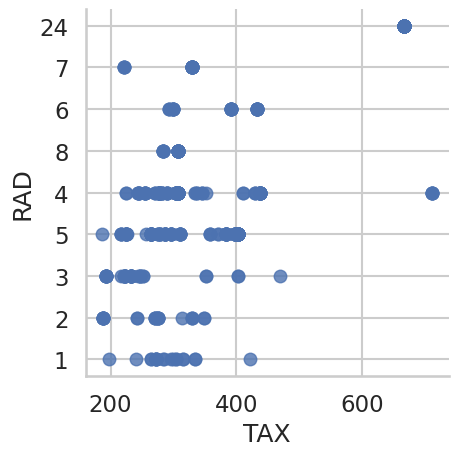

In [44]:
#sns.lmplot(x='TAX', y='RAD', data=data, size=7)
sns.lmplot(x='TAX', y='RAD', data=data)
plt.show()

In [44]:
# Challenge: Create a scatter plot between the house prices and the number of rooms (RM)

In [ ]:
rm_tgt_corr = round(data['RM'].corr(data['PRICE']), 3)

plt.figure(figsize=(9, 6))
plt.scatter(x=data['RM'], y=data['PRICE'], alpha=0.6, s=80, color='skyblue')

plt.title(f'RM vs PRICE (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM - Median nr of rooms', fontsize=14)
plt.ylabel('PRICE - property price in 000s', fontsize=14)
plt.show()

In [ ]:
sns.lmplot(x='RM', y='PRICE', data=data, size=7)
plt.show()

In [ ]:
%%time

sns.pairplot(data)
plt.show()

In [ ]:
%%time

sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

## Training & Test Dataset Split

In [ ]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

# % of training set
len(X_train)/len(features)

In [ ]:
# % of test data set
X_test.shape[0]/features.shape[0]

## Multivariable Regression

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)

#Challenge: print out r-squared for training and test datasets
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

## Data Transformations

In [ ]:
data['PRICE'].skew()

In [ ]:
y_log = np.log(data['PRICE'])
y_log.tail()

In [ ]:
y_log.skew()

In [ ]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

In [ ]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, size=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})
plt.show()

In [ ]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, size=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color':'cyan'})
plt.show()

## Regression using log prices

In [ ]:
prices = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

In [ ]:
# Charles River Property Premium
np.e**0.080475

## p values & Evaluating Coefficients

In [ ]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})


## Testing for Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [ ]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)
#type(X_incl_const)

In [ ]:
# Challenge: print out the number of columns in X_incl_const
len(X_incl_const.columns)
X_incl_const.shape[1]

In [ ]:
# Challenge: write a for loop that prints out all the VIFs for all the features
for i in range(X_incl_const.shape[1]):
    print(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print('All done!')

In [ ]:
vif = [] # empty list
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print(vif)

In [ ]:
vif = [variance_inflation_factor(exog=X_incl_const.values, 
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 
             'vif': np.around(vif, 2)})

In [ ]:
import this

## Model Simplification & the BIC

In [ ]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

# Challenge: find and check official docs for results object and print out BIC & r-squared
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

In [ ]:
# Reduced model #1 excluding INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

In [ ]:
# Reduced model #2 excluding INDUS and AGE
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

In [ ]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

## Residuals & Residual Plots

In [ ]:
# Modified model: transformed (using log prices) & simplified (dropping two features)
prices = np.log(data['PRICE']) # Use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
# results.resid

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Prediced log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

In [ ]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='navy')
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In [73]:
# Challenge: Using the original model with all the features and normal prices generate:
# Plot of actual vs predicted prices (incl. correlation) using a different colour
# Plot of residuals vs. predicted prices
# Plot of distribution of residuals (incl. skew)
# Analyse the results. 

In [ ]:
# Original model: normal prices & all features
prices = data['PRICE']
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

In [ ]:
# Model Omitting Key Features using log prices
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted variables: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [ ]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
             'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse], 
             'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])}, 
            index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

In [ ]:
# Challenge: Our estimate for a house price is $30,000. Calculate the upper and lower bound
# for a 95% prediction interval using the reduced log model

print('1 s.d. in log prices is', np.sqrt(reduced_log_mse))
print('2 s.d. in log prices is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

In [ ]:
30000 + np.e**(2*np.sqrt(reduced_log_mse)) * 1000 # Wrong! Add first. Transform afterwards. 

In [ ]:
val.get_dollar_estimate(8, 15, False)